# Table of Contents
 <p><div class="lev1"><a href="#Short-codebook"><span class="toc-item-num">1&nbsp;&nbsp;</span>Short codebook</a></div><div class="lev1"><a href="#Importing-libraries-and-data"><span class="toc-item-num">2&nbsp;&nbsp;</span>Importing libraries and data</a></div><div class="lev1"><a href="#Sample-characteristics"><span class="toc-item-num">3&nbsp;&nbsp;</span>Sample characteristics</a></div><div class="lev1"><a href="#Open-ended-question"><span class="toc-item-num">4&nbsp;&nbsp;</span>Open ended question</a></div><div class="lev1"><a href="#Likelihood-of-simstim"><span class="toc-item-num">5&nbsp;&nbsp;</span>Likelihood of simstim</a></div><div class="lev1"><a href="#Relating-technological-advance-and-likelihood-of-&quot;simstim&quot;"><span class="toc-item-num">6&nbsp;&nbsp;</span>Relating technological advance and likelihood of "simstim"</a></div><div class="lev1"><a href="#Some-playing-around-with-scifi-exposure"><span class="toc-item-num">7&nbsp;&nbsp;</span>Some playing around with scifi exposure</a></div>

# Short codebook

See below the variable names and what they mean.


 - simstimLikely --> "How likely is it that technologies such as “simstim” will exist in the future?"
    - 1 = technologies such as “simstim” will never exist
    - 101 = technologies such as “simstim” will certainly exist


 - BtBItakePart --> "As a participant, would you take part in research involving brain to brain interfacing (BtBI research)?"
    - 1 = Yes
    - 2 = No


- simstimTakePart --> "Given the hypothetical situation that "simstim" were an available option for entertainment, would you indulge in it?"
    - 1 = Yes
    - 2 = No


- BtBIwhyTakePart --> "Please provide your main reason for why you would or would not take part in BtBI research."


- age --> "What is your age?"


- sex --> "Are you male or female?"
    - 1 = male
    - 2 = female


- scifiBooks --> "I have read approximately ... different science-fiction books."


- scifiMovies --> "I have seen approximately ... different science-fiction movies."


- techAdvanceFascinating --> "Technological advance is rather ..."
    - 1 = scary
    - 101 = fascinating

# Importing libraries and data

In [1]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
from scipy import stats as stats
from sklearn.decomposition import PCA



In [2]:
os.getcwd() # Place the data file here

'/Users/stefanappelhoff/Desktop/2nd Year/Blog Entry 2/1 BtBI Data/analysis_of_data'

In [3]:
fname = 'BtBI_data_030816.csv'

df = pd.read_csv(fname, sep=';')

df # Show us the data



,simstimLikely,BtBItakePart,simstimTakePart,BtBIwhyTakePart,age,sex,scifiBooks,scifiMovies,techAdvanceFascinating
0,69,1,1,If it was only about visual categorisation or ...,23,2,5.0,10.0,101
1,7,1,1,it would be fascinating to experience the effe...,25,2,5.0,7.0,49
2,77,1,1,I would like to experience the world in the sa...,30,2,5.0,20.0,76
3,96,1,1,Because the possibilities fascinate me,25,2,35.0,60.0,49
4,66,1,1,For progress !!! ;),30,1,50.0,300.0,101
5,101,1,1,Depends on the technology. I would not want a...,44,1,500.0,250.0,101
6,99,1,1,thats future of humnity. I'm neuroscientist so...,29,1,15.0,200.0,100
7,93,1,2,I would like to support developping new and he...,22,2,5.0,7.0,50
8,35,1,1,I'm fascinated by the idea of BtBI,24,2,5.0,10.0,73
9,96,1,1,because i always been interested in research ...,23,1,NaN,NaN,93


# Sample characteristics

In [4]:
# 1=male, 2=female
df['sex'].value_counts() 

2    10
1     4
Name: sex, dtype: int64

In [5]:
df[['age', 'sex', 'simstimLikely', 'techAdvanceFascinating']].describe()

,age,sex,simstimLikely,techAdvanceFascinating
count,14.000000,14.000000,14.000000,14.000000
mean,26.500000,1.714286,69.571429,73.214286
std,5.721081,0.468807,30.548107,22.573567
min,22.000000,1.000000,7.000000,49.000000
25%,23.250000,1.250000,62.250000,50.000000
50%,24.500000,2.000000,76.000000,74.500000
75%,28.250000,2.000000,95.250000,98.250000
max,44.000000,2.000000,101.000000,101.000000


# Open ended question

In [6]:
# Check out, what the participants shared in the open end question
# "Please provide your main reason for why you would or would not take part in BtBI research."
# Only id #11 would not want to take part in BtBI research

for i in range(14):
    print(i, ')', df['BtBIwhyTakePart'][i], '\n')

0 ) If it was only about visual categorisation or sth similar, it'd be okay. If it's more elaborate, e.g., emotion transfer, then not - too personal 

1 ) it would be fascinating to experience the effects. However I would not participate in research that is potentially harming me. 

2 ) I would like to experience the world in the same way as another person does - everything is subjective and I believe that this would be a good way to better understand others.  

3 ) Because the possibilities fascinate me 

4 ) For progress !!! ;) 

5 ) Depends on the technology.  I would not want anything with today's technology like plastic or metal or even that in neuromancer injected into my skull.   However, Microscopic organic smart cells that can be easily removed as well as implanted would be a possibility.  I would not be Patient Zero though.For the survey i answered Yes. 

6 ) thats future of humnity. I'm neuroscientist so thats job and hobby to see experiments like this. 

7 ) I would like to

# Likelihood of simstim

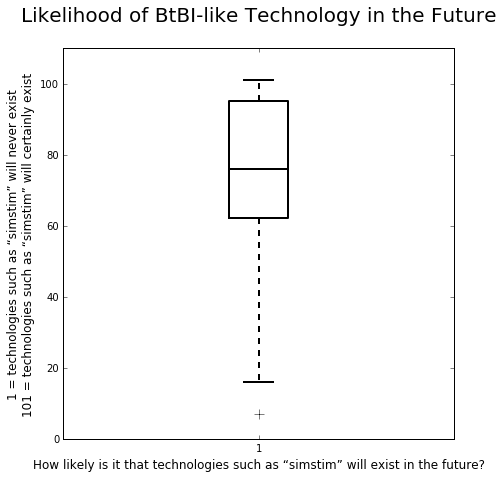

In [7]:
plt.figure(1,figsize=(7,7))
r = plt.boxplot(df['simstimLikely'])

# Set colors of boxplot
plt.setp(r['boxes'], color='BLACK', lw=2)
plt.setp(r['whiskers'], color='BLACK', lw=2)
plt.setp(r['medians'], color='BLACK', lw=2)
plt.setp(r['caps'], color='BLACK', lw=2)
plt.setp(r['fliers'], color='BLACK', markersize=10)



plt.ylim((0,110))

plt.title('Likelihood of BtBI-like Technology in the Future\n', fontsize=20)
plt.xlabel('How likely is it that technologies such as “simstim” will exist in the future?', fontsize=12)
plt.ylabel('1 = technologies such as “simstim” will never exist\n101 = technologies such as “simstim” will certainly exist', fontsize=12)

plt.savefig('simstim_Likely_box.jpg')

# Relating technological advance and likelihood of "simstim"

Pearson correlation coefficient: 0.4
Coefficient of determination: 0.16
p-value of least squares regression: 0.1551


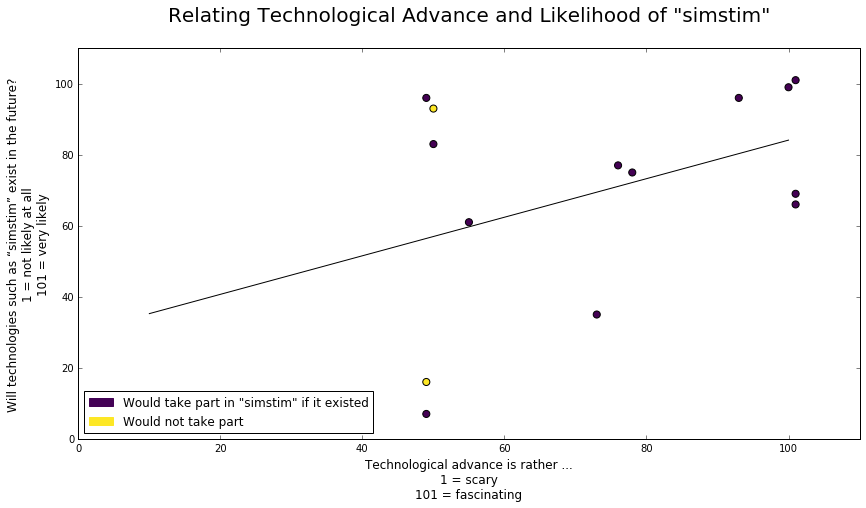

In [8]:
# The data to be plotted
x = df['techAdvanceFascinating']
y = df['simstimLikely']

# fit a regression line
m, b, r_value, p_value, std_err = stats.linregress(x,y) 


# Plot the figure
plt.figure(2, figsize=(14,7))

plt.scatter(x, y, c=df['simstimTakePart'], s=50, cmap='viridis') # Plot our data, use another variable for coloring

z = np.linspace(10,100,91) # plot the regression line over an interval wider than our data
plt.plot(z, m*z + b, 'k')

plt.xlim((0,110))
plt.ylim((0,110))

plt.title('Relating Technological Advance and Likelihood of "simstim"\n',
         fontsize = 20)
plt.xlabel('Technological advance is rather ...\n1 = scary\n101 = fascinating', fontsize=12)
plt.ylabel('Will technologies such as “simstim” exist in the future?\n1 = not likely at all\n101 = very likely',
          fontsize=12)

# Make a legend for the different colors of the dots
cm = plt.get_cmap('viridis')
would = mpatches.Patch(color=cm(1), label='Would take part in "simstim" if it existed')
would_not = mpatches.Patch(color=cm(1000), label='Would not take part')
plt.legend(handles=[would, would_not], loc=3)

# Print out some more information about the regression
print('Pearson correlation coefficient:',  round(r_value,2))
print('Coefficient of determination:', round(r_value**2,2))
print('p-value of least squares regression:', round(p_value,4))


# Save plot
plt.savefig('tech_likeli_regr.jpg')

# Some playing around with scifi exposure

Person correlation: 0.8
Coefficient of Determination: 0.64
p-value of least squares regression: 0.001


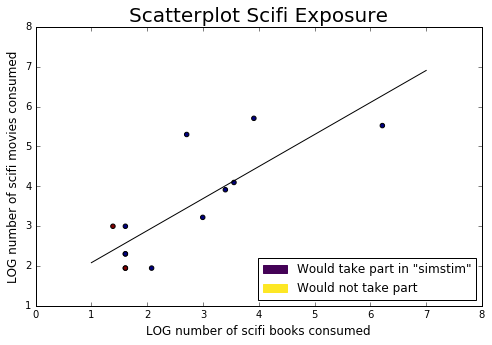

In [9]:
# Scifi books vs. scifi movies

df_noNA = df.dropna()

x = df_noNA['scifiBooks']
y = df_noNA['scifiMovies']

m, b, r_value, p_value, std_err = stats.linregress(np.log(x),np.log(y)) 


plt.figure(3, figsize=(8,5))



z=np.linspace(1,7,8)
plt.plot(z, m*z + b, 'k')


plt.scatter(np.log(x),np.log(y), c=df_noNA['simstimTakePart']) # log transform to bring outlier back to us :-)
plt.title('Scatterplot Scifi Exposure', fontsize=20)
plt.xlabel('LOG number of scifi books consumed', fontsize=12)
plt.ylabel('LOG number of scifi movies consumed', fontsize=12)

# Make a legend for the different colors of the dots
cm = plt.get_cmap('viridis')
would = mpatches.Patch(color=cm(1), label='Would take part in "simstim"')
would_not = mpatches.Patch(color=cm(1000), label='Would not take part')
plt.legend(handles=[would, would_not], loc=4)


print('Person correlation:', round(r_value,2))
print('Coefficient of Determination:', round(r_value**2,2))
print('p-value of least squares regression:', round(p_value,4))




In [10]:
# Do a PCA to get a single item from the two scifi-items

q = PCA(n_components=1)

pca = q.fit(np.log(np.asarray(df_noNA[['scifiBooks', 'scifiMovies']])))

In [11]:
pca.explained_variance_ratio_ # 90% variance explained is nice

array([ 0.90082673])

In [12]:
# Now get a single item: scifi exposure
pca.fit_transform(np.log(np.asarray(df_noNA[['scifiBooks', 'scifiMovies']])))

array([[-1.502776  ],
       [-1.75541247],
       [-1.01181283],
       [ 1.13996605],
       [ 2.53172456],
       [ 4.02798235],
       [ 1.39464346],
       [-1.75541247],
       [-1.502776  ],
       [ 0.12482911],
       [ 0.90201066],
       [-1.42363626],
       [-1.16933017]])

Person correlation: 0.49
Coefficient of Determination: 0.24
p-value of least squares regression: 0.0878


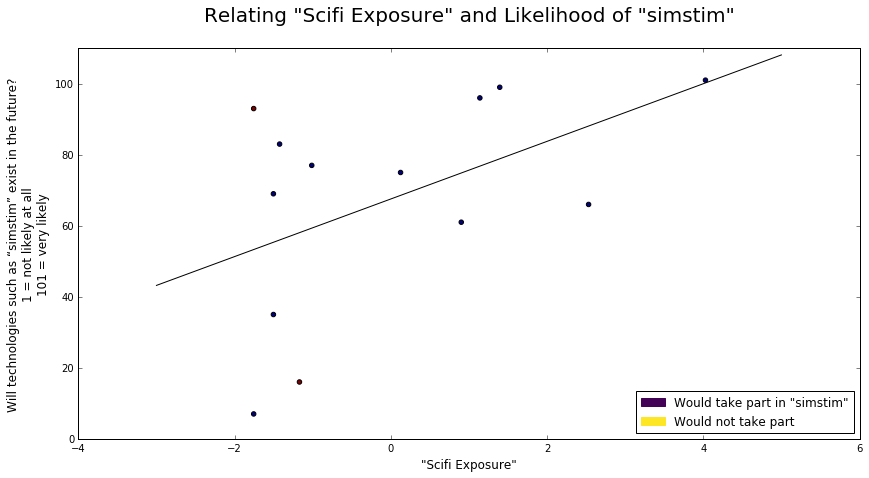

In [13]:
# Check the relationship between scifi exposure and likelihood of simstim

x = pca.fit_transform(np.log(np.asarray(df_noNA[['scifiBooks', 'scifiMovies']])))
y = np.asarray(df_noNA['simstimLikely'])

plt.figure(4, figsize=(14,7))


plt.scatter(x,y, c=df_noNA['simstimTakePart'])

m, b, r_value, p_value, std_err = stats.linregress(x.squeeze(),y) 

z=np.linspace(-3,5,9)
plt.plot(z, m*z + b, 'k')

# Make a legend for the different colors of the dots
cm = plt.get_cmap('viridis')
would = mpatches.Patch(color=cm(1), label='Would take part in "simstim"')
would_not = mpatches.Patch(color=cm(1000), label='Would not take part')
plt.legend(handles=[would, would_not], loc=4)


plt.ylim((0,110))

plt.title('Relating "Scifi Exposure" and Likelihood of "simstim"\n',
         fontsize = 20)
plt.xlabel('"Scifi Exposure"', fontsize=12)
plt.ylabel('Will technologies such as “simstim” exist in the future?\n1 = not likely at all\n101 = very likely',
          fontsize=12)




print('Person correlation:', round(r_value,2))
print('Coefficient of Determination:', round(r_value**2,2))
print('p-value of least squares regression:', round(p_value,4))




In [14]:
# Correlation of Scifi exposure with attitude towards advance of technology
r_value, p_value = stats.pearsonr(np.asarray(df_noNA['techAdvanceFascinating']), x.squeeze())

print('Pearson correlation coefficient:', round(r_value,2))
print('p-value:', round(p_value,4))

Pearson correlation coefficient: 0.54
p-value: 0.0551
